# CSE - 574 - Introduction to Machine Learning
## Project - 3 - Part 1

#### Submitted by - Vishva Nitin Patel (vishvani - UB # 50318625)

In [1]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [2]:
#checking the dimensions
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
print(nsamples)
print(x_train.shape)

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))
print(nsamples)
print(x_train.shape)

x_train = x_train/255
x_test = x_test/255

60000
(60000, 784)
10000
(60000, 784)


In [0]:
# Mapping to labels
for counter in range(len(y_train)):
  print(y_train[counter]," ",counter)
  if counter == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [0]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

In [0]:
#Applying K-Means:
n_clusters = len(np.unique(y_train))
print(n_clusters) # 10
kmeans = KMeans(n_clusters = n_clusters, random_state=4, init = np.array(cluster_array))

10


In [0]:
kmeans.fit(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
       init=array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]),
       max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=4, tol=0.0001, verbose=0)

Confusion Matrix:
[[528   9  25  98  12  86 235   1   6   0]
 [  3 862   2  77  11  16  28   0   1   0]
 [  5   3 320  10 282  56 320   0   4   0]
 [ 11 316   3 449  16  83 120   0   2   0]
 [  1  10 196 112 510  40 125   0   6   0]
 [  0   0   0   0   0 673  11 232   3  81]
 [103   9 145  84 185 113 347   1  13   0]
 [  0   0   0   0   0  82   0 868   0  50]
 [  0   1  55   9  11  64 215  68 576   1]
 [  0   0   1   2   1  35   8 111   1 841]]
Accuracy: 59.74 %


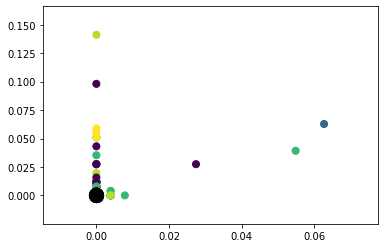

In [0]:
y_pred = kmeans.predict(x_test)

con_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(format(con_mat))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {} %'.format(accuracy*100))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='viridis')
my_center = kmeans.cluster_centers_
my_label = kmeans.labels_
plt.scatter(my_center[:, 0], my_center[:, 1], c='black', s=200, alpha=0.5);

## Project - 3 - Part 2



In [4]:
#Import the required files and data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
from time import time
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [5]:
#checking the dimensions
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
print(nsamples)
print(x_train.shape)

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))
print(nsamples)
print(x_test.shape)

x_train = x_train/255
x_test = x_test/255

60000
(60000, 784)
10000
(10000, 784)


In [0]:
#Mapping cluster to label
for counter in range(len(y_train)):
  print(y_train[counter]," ",counter)
  if counter == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [0]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

In [0]:
#The Auto-Encoder Part:
encoder_input = Input(shape=(784,))

# "encoder_model" is encoded representation of the input
encoder_model = Dense(500, activation='relu')(encoder_input)
encoder_model = Dense(500, activation='relu')(encoder_model)
encoder_model = Dense(2000, activation='relu')(encoder_model)
encoder_model = Dense(10, activation='sigmoid')(encoder_model)

# "decoder_model" is lossy reconstruction of the input
decoder_model = Dense(2000, activation='relu')(encoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(784)(decoder_model)

# this model maps an input to its reconstruction
autoencoder = Model(encoder_input, decoder_model)

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000     
_________________________________________________________________
dense_6 (Dense)              (None, 500)               1000

In [0]:
encoder = Model(encoder_input, encoder_model)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
train_history = autoencoder.fit(x_train, x_train, epochs=150, verbose=1, batch_size=2048, validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/150





60000/60000 [==============================] - 6s 96us/step - loss: 0.0944 - acc: 0.0015 - val_loss: 0.0684 - val_acc: 6.0000e-04
Epoch 2/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.0658 - acc: 0.0012 - val_loss: 0.0602 - val_acc: 0.0015
Epoch 3/150
60000/60000 [==============================] - 1s 16us/step - loss: 0.0537 - acc: 0.0068 - val_loss: 0.0462 - val_acc: 0.0160
Epoch 4/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.0433 - acc: 0.0148 - val_loss: 0.0398 - val_acc: 0.0167
Epoch 5/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.0386 - acc: 0.0153 - val_loss: 0.0391 - val_acc: 0.0095
Epoch 6/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.0356 - acc: 0.0093 - val_loss: 0.0331 - val_acc: 0.0061
Epoch 7/150
60000/60000 [==============================] - 1s 17us/step - loss: 0.0320 - acc: 0.0092 - val_los

In [0]:
pred_auto_train = encoder.predict(x_train)
encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cluster_pred_array = [pred_auto_train[1], pred_auto_train[16], pred_auto_train[27], pred_auto_train[20], pred_auto_train[29], pred_auto_train[13], pred_auto_train[18], pred_auto_train[6], pred_auto_train[23], pred_auto_train[0]]

In [0]:
km = KMeans(n_clusters=10, init = np.array(cluster_pred_array))
pred_auto = encoder.predict(x_test)
km.fit(pred_auto_train)
y_pred = km.predict(pred_auto)

confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(format(confusion_mat))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {} %'.format(accuracy*100))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Confusion Matrix:
[[750   9  53 118   6   1  52   2   9   0]
 [ 22 883  17  69   5   0   4   0   0   0]
 [  9   1 485  14  90   0 397   0   4   0]
 [ 23  79  33 819   9   0  36   0   1   0]
 [  0   8 259 114 292   0 325   0   2   0]
 [  0   0   2   2   1 386   1 555  26  27]
 [207   7 288 103  46   0 328   2  19   0]
 [  0   0   0   0   0   1   0 945  16  38]
 [  1   9  42  23 412   4  54  19 432   4]
 [  0   0   1   1   1  35   1 149  22 790]]
Accuracy: 61.1 %


Text(0, 0.5, 'Training Loss')

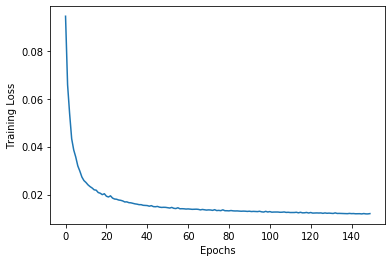

In [0]:
plt.plot(train_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Validation Loss')

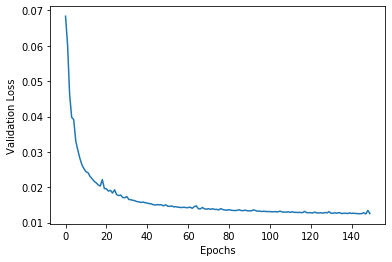

In [0]:
plt.plot(train_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

Text(0, 0.5, 'Training Accuracy')

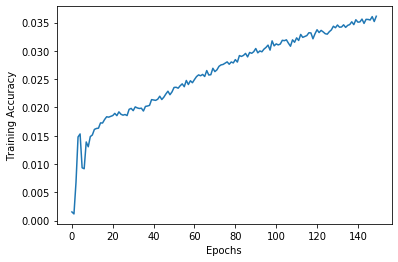

In [0]:
plt.plot(train_history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Validation Accuracy')

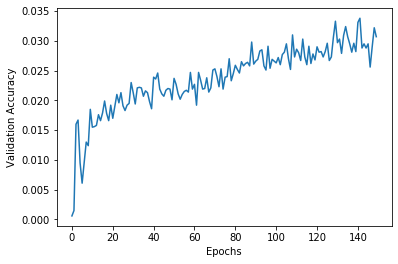

In [0]:
plt.plot(train_history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

## Project - 3 - Part 3

In [6]:
#Necessary Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [7]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))
print(nsamples)
print(x_train.shape)

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))
print(nsamples) 
print(x_train.shape)

x_train = x_train/255
x_test = x_test/255

60000
(60000, 784)
10000
(60000, 784)


In [0]:
for counter in range(len(y_train)):
  print(y_train[counter]," ",counter)
  if counter == 30:
    break

9   0
0   1
0   2
3   3
0   4
2   5
7   6
2   7
5   8
5   9
0   10
9   11
5   12
5   13
7   14
9   15
1   16
0   17
6   18
4   19
3   20
1   21
4   22
8   23
4   24
3   25
0   26
2   27
4   28
4   29
5   30


In [0]:
cluster_array = [x_train[1], x_train[16], x_train[27], x_train[20], x_train[29], x_train[13], x_train[18], x_train[6], x_train[23], x_train[0]]

In [0]:
#The Auto - Encoder Part

encoder_input = Input(shape=(784,))

# "encoder_model" is encoded representation of the input
encoder_model = Dense(500, activation='relu')(encoder_input)
encoder_model = Dense(500, activation='relu')(encoder_model)
encoder_model = Dense(2000, activation='relu')(encoder_model)
encoder_model = Dense(10, activation='sigmoid')(encoder_model)

# "decoder_model" is lossy reconstruction of the input
decoder_model = Dense(2000, activation='relu')(encoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(500, activation='relu')(decoder_model)
decoder_model = Dense(784)(decoder_model)

# this model maps an input to its reconstruction
autoencoder = Model(encoder_input, decoder_model)

In [0]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              22000     
_________________________________________________________________
dense_14 (Dense)             (None, 500)               1000

In [0]:
encoder = Model(encoder_input, encoder_model)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
train_history = autoencoder.fit(x_train, x_train, epochs=150, verbose=1, batch_size=2048, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 45us/step - loss: 0.0958 - acc: 0.0018 - val_loss: 0.0703 - val_acc: 0.0014
Epoch 2/150
60000/60000 [==============================] - 2s 32us/step - loss: 0.0682 - acc: 0.0012 - val_loss: 0.0664 - val_acc: 0.0012
Epoch 3/150
60000/60000 [==============================] - 2s 32us/step - loss: 0.0613 - acc: 0.0011 - val_loss: 0.0534 - val_acc: 0.0014
Epoch 4/150
60000/60000 [==============================] - 2s 31us/step - loss: 0.0454 - acc: 0.0118 - val_loss: 0.0410 - val_acc: 0.0189
Epoch 5/150
60000/60000 [==============================] - 2s 32us/step - loss: 0.0388 - acc: 0.0168 - val_loss: 0.0367 - val_acc: 0.0134
Epoch 6/150
60000/60000 [==============================] - 2s 32us/step - loss: 0.0358 - acc: 0.0070 - val_loss: 0.0339 - val_acc: 0.0054
Epoch 7/150
60000/60000 [==============================] - 2s 32us/step - loss: 0.0323 - acc: 0.0112 - val_loss: 0.0307 - 

In [0]:
pred_auto_train = encoder.predict(x_train)
encoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
cluster_pred_array = [pred_auto_train[1], pred_auto_train[16], pred_auto_train[27], pred_auto_train[20], pred_auto_train[29], pred_auto_train[13], pred_auto_train[18], pred_auto_train[6], pred_auto_train[23], pred_auto_train[0]]

In [0]:
km = KMeans(n_clusters=10, init = np.array(cluster_pred_array))
pred_auto = encoder.predict(x_test)
km.fit(pred_auto_train)
y_pred = km.predict(pred_auto)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [0]:
#THE GMM IMPLEMENTATION:
gmm = GaussianMixture(n_components = 10, n_init=1, means_init=cluster_pred_array)
k_means_gmm = gmm.fit(pred_auto_train)

y_gmm_train = k_means_gmm.predict(pred_auto_train)
y_gmm_test = k_means_gmm.predict(pred_auto)

In [0]:
con_mat = confusion_matrix(y_test, y_gmm_test)
print('Confusion Matrix:')
print(format(con_mat))

accuracy = accuracy_score(y_train, y_gmm_train)
print('Training Accuracy: {} %'.format(accuracy*100))

accuracy = accuracy_score(y_test, y_gmm_test)
print('Testing Accuracy: {} %'.format(accuracy*100))

Confusion Matrix:
[[692   0   1  86   6   0 202   0  13   0]
 [  1 879   0  40   0   0  78   0   2   0]
 [  7   0 455   3 408   0 125   0   2   0]
 [ 26   2   0 587  13   0 368   0   4   0]
 [  2   0 366   7 333   0 291   0   1   0]
 [  0   0   0   0   0 498   1 448   5  48]
 [186   0 189  41 316   0 255   0  13   0]
 [  0   0   0   0   0   9   0 761   1 229]
 [  0   0   0   7   3   2  79   7 900   2]
 [  0   0   0   0   0  14  13  13   0 960]]
Training Accuracy: 64.15666666666667 %
Testing Accuracy: 63.2 %
